In [3]:
from google.colab import drive
from torchvision import transforms
from torchvision.datasets import ImageFolder

# Mount your Google Drive
drive.mount('/content/drive')

base_path = '/content/drive/My Drive/Comp6321 project dataset/'

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Adjust size as needed
    transforms.ToTensor(),
])

datasets = {}

dataset_names = ['Colorectal Cancer', 'Prostate Cancer', 'Animal Faces']

for dataset_name in dataset_names:
    dataset_path = base_path + dataset_name
    dataset = ImageFolder(root=dataset_path, transform=transform)
    datasets[dataset_name] = dataset


Mounted at /content/drive


In [4]:
# Define the device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

NameError: ignored

# task 1


## train a CNN model from scratch for classification on dataset 1 using Resnet-50 architecture





## using a pre-trained network for classification on dataset 1


In [9]:
import torch
dataset = datasets['Colorectal Cancer']
from torch.utils.data import DataLoader
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

import torchvision.models as models
model = models.resnet50(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
import torch.nn as nn
num_classes = len(dataset.classes)
model.fc = nn.Linear(2048, num_classes)  # 2048 is the number of features in the ResNet-50 classifier

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)

model.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [10]:
from tqdm import tqdm  # Import the tqdm library

num_epochs = 10  # You can adjust the number of training epochs
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    # Create a tqdm progress bar for the training loop
    train_loader_iterator = tqdm(train_loader, total=len(train_loader), desc=f"Epoch {epoch + 1}/{num_epochs}")

    for inputs, labels in train_loader_iterator:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backpropagation and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Print training loss for the current epoch
    print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss: {running_loss / len(train_loader)}")

print("Finished Training")

# Evaluation
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate test accuracy
accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Epoch 1/10: 100%|██████████| 150/150 [27:16<00:00, 10.91s/it]


Epoch 1/10, Training Loss: 0.4405768166979154


Epoch 2/10: 100%|██████████| 150/150 [00:30<00:00,  4.91it/s]


Epoch 2/10, Training Loss: 0.2506372473637263


Epoch 3/10: 100%|██████████| 150/150 [00:30<00:00,  4.98it/s]


Epoch 3/10, Training Loss: 0.20577086960275967


Epoch 4/10: 100%|██████████| 150/150 [00:30<00:00,  4.98it/s]


Epoch 4/10, Training Loss: 0.185989691739281


Epoch 5/10: 100%|██████████| 150/150 [00:30<00:00,  4.97it/s]


Epoch 5/10, Training Loss: 0.17586182485024135


Epoch 6/10: 100%|██████████| 150/150 [00:30<00:00,  4.97it/s]


Epoch 6/10, Training Loss: 0.16294636798401674


Epoch 7/10: 100%|██████████| 150/150 [00:30<00:00,  4.97it/s]


Epoch 7/10, Training Loss: 0.1504397277534008


Epoch 8/10: 100%|██████████| 150/150 [00:30<00:00,  4.99it/s]


Epoch 8/10, Training Loss: 0.14994857283929983


Epoch 9/10: 100%|██████████| 150/150 [00:29<00:00,  5.02it/s]


Epoch 9/10, Training Loss: 0.14098049342632293


Epoch 10/10: 100%|██████████| 150/150 [00:30<00:00,  4.97it/s]


Epoch 10/10, Training Loss: 0.14254079242547354
Finished Training
Test Accuracy: 96.17%


# task 2

## extracting features from dataset 2 and dataset 3 using the CNN encoder trained in task 1


## extracting features from dataset 2 and dataset 3 using pre-trained CNN encoders ( VGG16)

note: we run the following cell once and store the features in drive, and after that we can load them from the drive.

In [ ]:
# import torch
# import torch.nn as nn
# from torchvision import transforms
# from torchvision.datasets import ImageFolder
# from torch.utils.data import DataLoader
# import torchvision.models as models
# from tqdm import tqdm

# # Check if GPU is available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Define the pre-trained model (e.g., VGG16) and remove the final classification layer
# pretrained_model = models.vgg16(pretrained=True).to(device)
# feature_extractor = nn.Sequential(*list(pretrained_model.features.children())).to(device)  # Remove the last layer

# # Define data transformations for normalization to ImageNet
# normalize_transform = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

# # Initialize datasets and data loaders
# d2_batch_size = 32
# d3_batch_size = 32

# # Data loaders for the Prostate Cancer and Animal Faces datasets
# prostate_data_loader = DataLoader(datasets['Prostate Cancer'], batch_size=d2_batch_size, shuffle=True)
# animal_faces_data_loader = DataLoader(datasets['Animal Faces'], batch_size=d3_batch_size, shuffle=True)

# # Initialize tqdm progress bars for feature extraction
# prostate_pbar = tqdm(total=len(prostate_data_loader), desc="Prostate Features")
# animal_faces_pbar = tqdm(total=len(animal_faces_data_loader), desc="Animal Faces Features")

# # Extract features from the datasets
# prostate_features = []
# animal_faces_features = []

# for data_loader, features_list, pbar in [(prostate_data_loader, prostate_features, prostate_pbar), (animal_faces_data_loader, animal_faces_features, animal_faces_pbar)]:
#     feature_extractor.eval()  # Set the feature extractor to evaluation mode
#     progress_counter = 0
#     with torch.no_grad():
#         for images, _ in data_loader:
#             # Move images to the GPU
#             images = images.to(device)
#             # Apply ImageNet normalization to the images before feature extraction
#             images = normalize_transform(images)
#             features = feature_extractor(images)
#             features_list.append(features)
#             progress_counter = progress_counter+1
#             if progress_counter % 20 ==1:
#               pbar.update(20)  # Update the progress bar
#               progress_counter = 0

# # Close the tqdm progress bars
# prostate_pbar.close()
# animal_faces_pbar.close()

# # Now train separate classifiers on top of the extracted features for each dataset




Prostate Features:   0%|          | 0/188 [00:00<?, ?it/s]


Prostate Features:  16%|█▌        | 30/188 [17:30<1:32:13, 35.02s/it]


Prostate Features:   1%|          | 1/188 [00:19<59:59, 19.25s/it]

Prostate Features:   1%|          | 2/188 [00:32<48:13, 15.56s/it]

Prostate Features:   2%|▏         | 3/188 [00:45<44:36, 14.47s/it]

Prostate Features:   2%|▏         | 4/188 [00:57<41:26, 13.51s/it]

Prostate Features:   3%|▎         | 5/188 [01:11<42:10, 13.83s/it]

Prostate Features:   3%|▎         | 6/188 [01:21<37:35, 12.39s/it]

Prostate Features:   4%|▎         | 7/188 [01:36<39:46, 13.19s/it]

Prostate Features:   4%|▍         | 8/188 [01:47<37:51, 12.62s/it]

Prostate Features:   5%|▍         | 9/188 [02:00<37:33, 12.59s/it]

Prostate Features:   5%|▌         | 10/188 [02:10<35:22, 11.93s/it]

Prostate Features:   6%|▌         | 11/188 [02:23<36:09, 12.26s/it]

Prostate Features:   6%|▋         | 12/188 [02:36<36:12, 12.34s/it]

Prostate Features:   7%|▋         | 13/188 [02

In [ ]:
# import pickle

# # Define the shared folder path
# shared_folder_path = base_path

# # Save the extracted features in the shared folder using pickle
# with open(shared_folder_path + 'prostate_features.pkl', 'wb') as file:
#     pickle.dump(prostate_features, file)

# with open(shared_folder_path + 'animal_faces_features.pkl', 'wb') as file:
#     pickle.dump(animal_faces_features, file)


In [22]:
import pickle

# Define the shared folder path
shared_folder_path = base_path

# Load the saved features from pickle files in the shared folder
with open(shared_folder_path + 'prostate_features.pkl', 'rb') as file:
    prostate_features = pickle.load(file)

with open(shared_folder_path + 'animal_faces_features.pkl', 'rb') as file:
    animal_faces_features = pickle.load(file)


In [26]:
temp2 = np.concatenate([feature.view(feature.size(0), -1).cpu().numpy() for feature in temp], axis=0)

In [27]:
print(type(temp2))

<class 'numpy.ndarray'>


In [28]:
print(temp2.shape)

(5984, 25088)


### Apply t-SNE for dimensionality reduction and visualization of the extracted features on Dataset 2 and dataset 3


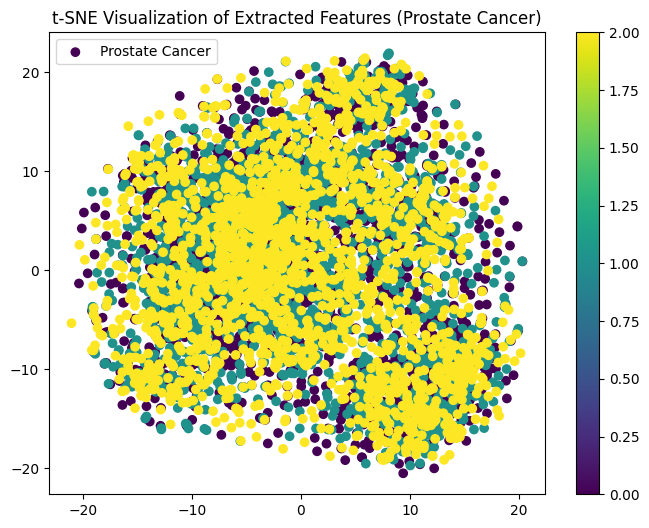

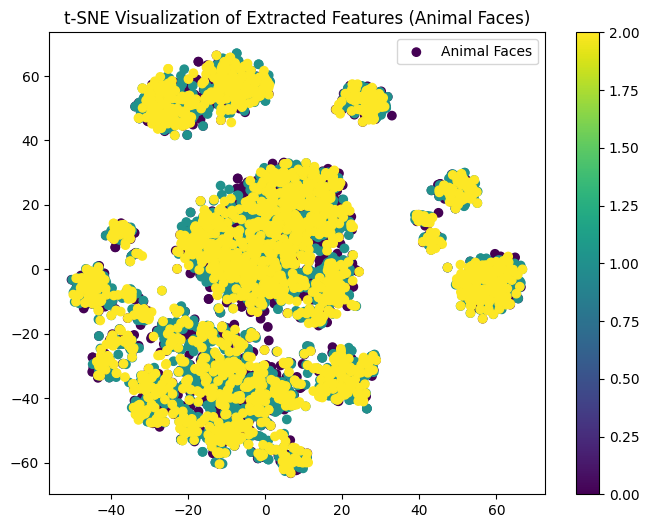

In [30]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Remove the last batch (incomplete batch) from the feature lists
prostate_features = prostate_features[:-1]
animal_faces_features = animal_faces_features[:-1]

# Convert the feature lists to NumPy arrays and flatten them
prostate_features = np.concatenate([feature.view(feature.size(0), -1).cpu().numpy() for feature in prostate_features], axis=0)
animal_faces_features = np.concatenate([feature.view(feature.size(0), -1).cpu().numpy() for feature in animal_faces_features], axis=0)

# Get the number of data points for each dataset after removing the last batch
num_prostate_samples = prostate_features.shape[0]
num_animal_faces_samples = animal_faces_features.shape[0]

# Get class labels from the ImageFolder dataset and only keep labels for the remaining data points
prostate_class_labels = [target for _, target in datasets['Prostate Cancer']][:num_prostate_samples]
animal_faces_class_labels = [target for _, target in datasets['Animal Faces']][:num_animal_faces_samples]

# Apply t-SNE for dimensionality reduction and visualization to Prostate Cancer dataset
tsne_prostate = TSNE(n_components=2, random_state=0)
reduced_prostate_features = tsne_prostate.fit_transform(prostate_features)

# Apply t-SNE for dimensionality reduction and visualization to Animal Faces dataset
tsne_animal_faces = TSNE(n_components=2, random_state=0)
reduced_animal_faces_features = tsne_animal_faces.fit_transform(animal_faces_features)

# Visualize the reduced features for the Prostate Cancer dataset with class labels
plt.figure(figsize=(8, 6))
plt.scatter(reduced_prostate_features[:, 0], reduced_prostate_features[:, 1], c=prostate_class_labels, cmap='viridis', label='Prostate Cancer')
plt.title('t-SNE Visualization of Extracted Features (Prostate Cancer)')
plt.legend()
plt.colorbar()
plt.show()

# Visualize the reduced features for the Animal Faces dataset with class labels
plt.figure(figsize=(8, 6))
plt.scatter(reduced_animal_faces_features[:, 0], reduced_animal_faces_features[:, 1], c=animal_faces_class_labels, cmap='viridis', label='Animal Faces')
plt.title('t-SNE Visualization of Extracted Features (Animal Faces)')
plt.legend()
plt.colorbar()
plt.show()
